In [3]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.display         import display, Markdown, Latex

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

print('Done')

Done


In [5]:
files = [
    # Genetic algorithms
    'ITEA-resultsregression',
    'FEATFull-resultsregression',
    'FEAT-resultsregression',
    'SymTree-resultsregression',
    
    'GSGP-resultsregression',
    'GPLearn-resultsregression',
    'DCGP-resultsregression',
    
    # Non parametric regressions
    'forest-resultsregression',
    'knn-resultsregression',
    'tree-resultsregression',
    
    # linear regressions
    'elnet-resultsregression',
    'lasso-resultsregression',
    'lassolars-resultsregression',
    'ridge-resultsregression',
]

def highlight_min(s):
    
    is_min = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]


In [33]:
RMSES_train = []
RMSES_test  = []

plot_train = []
plot_test  = []

rmses_path = '../../../results/rmse/'

for file in files:
    print(file)
    fname = f'{rmses_path+file}.csv'

    resultsDF = pd.read_csv(fname)
    
    try:
        resultsDF = resultsDF.rename(columns={'dataset': 'Dataset'})
    except:
        pass
    
    resultsDF = resultsDF[['Dataset', 'RMSE_train', 'RMSE_test']]
    
    # Change median or mean here
    resultsDF_mean = resultsDF.groupby('Dataset').mean()
    resultsDF_mean.columns = ['RMSE_train_mean', 'RMSE_test_mean']

    resultsDF_std = resultsDF.groupby('Dataset').std()
    resultsDF_std.columns = ['RMSE_train_std', 'RMSE_test_std']

    resultsDF_ = pd.merge(resultsDF_mean, resultsDF_std, left_index=True, right_index=True)
    
    plot_train.append(pd.Series(
        data = resultsDF_['RMSE_train_mean'],
        index = resultsDF_.index,
        name = file.replace('-resultsregression', '')
    ))
    
    RMSES_train.append(pd.Series(
        data = [f'{str(round(mean, 2))}\pm{str(round(std, 2))}' for mean, std in 
                zip(resultsDF_['RMSE_train_mean'].values, resultsDF_['RMSE_train_std'].values)],
        index = resultsDF_.index,
        name = file.replace('-resultsregression', '')
    ))
    
    plot_test.append(pd.Series(
        data = resultsDF_['RMSE_test_mean'],
        index = resultsDF_.index,
        name = file.replace('-resultsregression', '')
    ))
    
    RMSES_test.append(pd.Series(
        data = [f'{str(round(mean, 2))}\pm{str(round(std, 2))}' for mean, std in 
                zip(resultsDF_['RMSE_test_mean'].values, resultsDF_['RMSE_test_std'].values)],
        index = resultsDF_.index,
        name = file.replace('-resultsregression', '')
    ))

ITEA-resultsregression
FEATFull-resultsregression
FEAT-resultsregression
SymTree-resultsregression
GSGP-resultsregression
GPLearn-resultsregression
DCGP-resultsregression
forest-resultsregression
knn-resultsregression
tree-resultsregression
elnet-resultsregression
lasso-resultsregression
lassolars-resultsregression
ridge-resultsregression


In [43]:
# Change what is being concatenated:
# RMSES_train or RMSES_test
df = pd.concat(RMSES_train, axis=1).T

df_lowd = df[[
        
    # Low dimensionality
    'airfoil',
    'concrete',
    'energyCooling',
    'energyHeating',
    'yacht'
]]

df_highd = df[[
    # High dimensionality
    'Geographical',
    'towerData',
    'tecator',
    'wineRed',
    'wineWhite',
]]


print(df_lowd.to_latex(escape=False))
print(df_highd.to_latex(escape=False))

\begin{tabular}{llllll}
\toprule
Dataset &       airfoil &      concrete & energyCooling & energyHeating &         yacht \\
\midrule
ITEA      &   2.27\pm0.06 &   5.81\pm0.11 &   1.44\pm0.05 &   0.46\pm0.02 &   0.49\pm0.06 \\
FEATFull  &   3.06\pm0.34 &    6.0\pm0.29 &    1.6\pm0.04 &   0.47\pm0.02 &   0.54\pm0.13 \\
FEAT      &   3.48\pm0.46 &   6.63\pm0.44 &   1.72\pm0.13 &   0.93\pm0.41 &   1.73\pm0.63 \\
SymTree   &    1.5\pm0.08 &   3.67\pm0.14 &   1.12\pm0.05 &   0.48\pm0.02 &   1.21\pm0.35 \\
GSGP      &   10.6\pm4.62 &   7.24\pm0.74 &   2.07\pm0.43 &    1.5\pm0.45 &   8.81\pm1.11 \\
GPLearn   &  10.28\pm7.26 &  13.64\pm1.89 &   4.44\pm0.91 &   4.67\pm0.92 &   6.38\pm2.45 \\
DCGP      &   7.56\pm1.33 &  19.45\pm2.42 &  12.89\pm2.35 &  13.74\pm2.02 &  17.09\pm1.76 \\
forest    &    1.8\pm0.03 &   2.97\pm0.07 &   1.22\pm0.03 &    0.4\pm0.01 &    0.4\pm0.02 \\
knn       &    5.9\pm0.08 &   8.27\pm0.09 &   1.97\pm0.04 &   2.37\pm0.06 &   8.75\pm0.68 \\
tree      &   2.04\pm0.08 &   

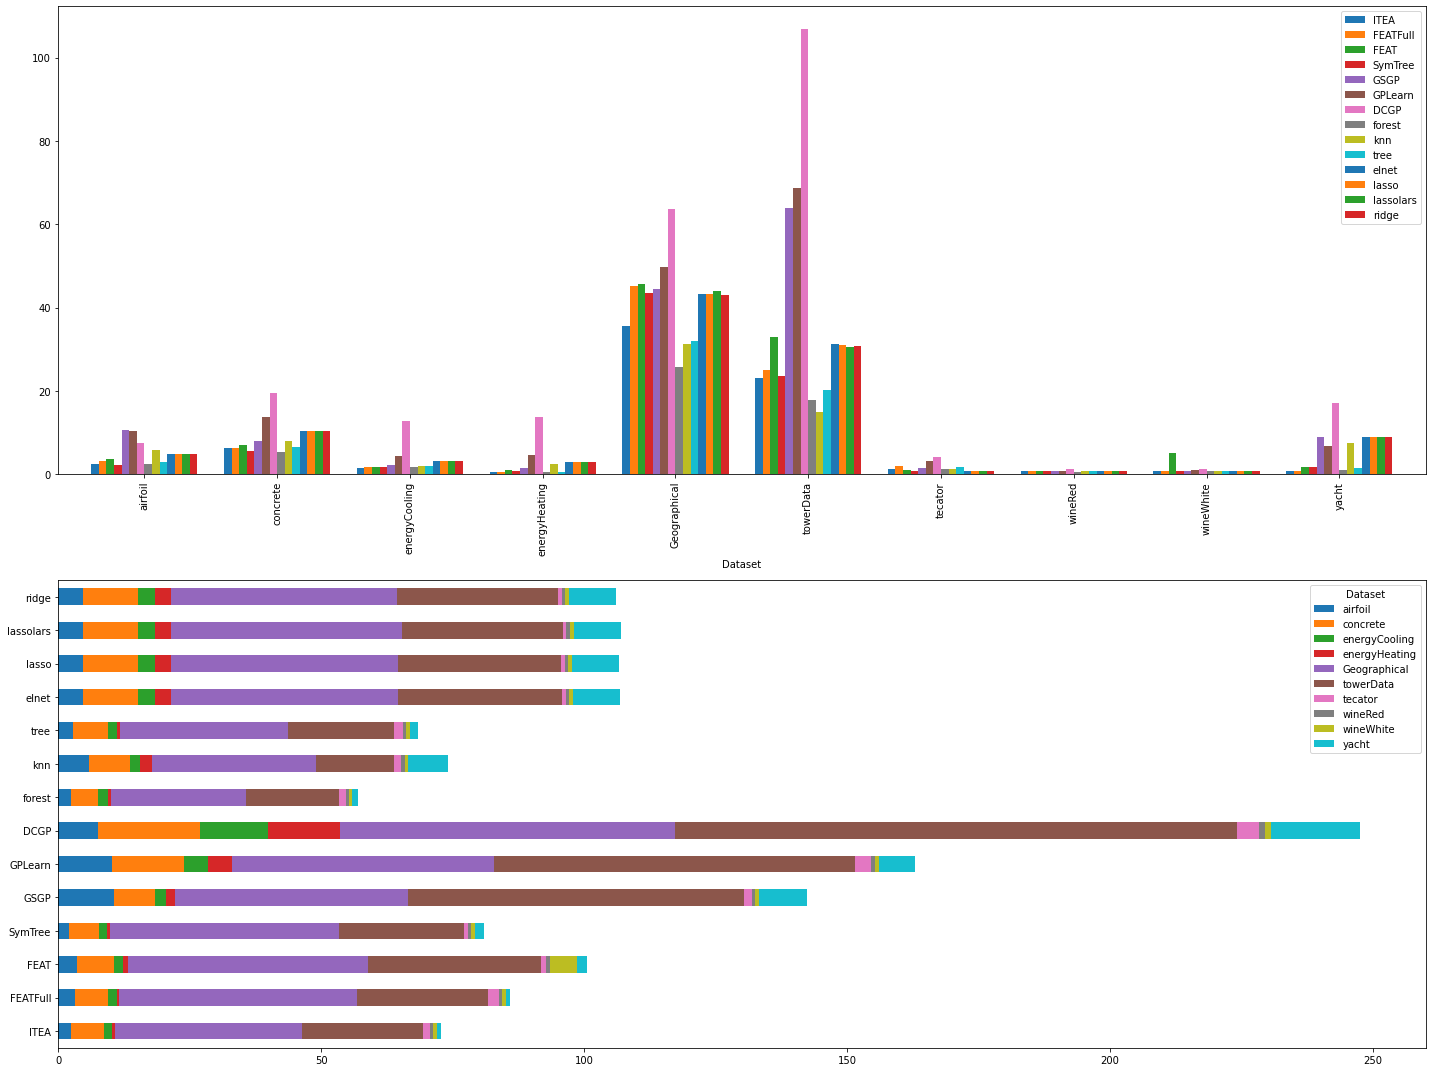

In [41]:
# Change what is being concatenated:
# plot_train and plot_test
df = pd.concat(plot_test, axis=1).T

# Ordenando as colunas
df = df[[
    'airfoil',
    'concrete',
    'energyCooling',
    'energyHeating',
    'Geographical',
    'towerData',
    'tecator',
    'wineRed',
    'wineWhite',
    'yacht',
]]

fig, ax = plt.subplots(2, 1, figsize=(20, 15))

df.T.plot.bar(ax=ax[0], width=0.8)
df.plot.barh(stacked=True, ax = ax[1])
plt.tight_layout()
plt.show()